# Data Mining Project - Group XX 2025/2026

# Import Libraries

In [2]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

#o svg consegue ampliar infinitamente os gráficos sem perder qualidade mas às vezes é mais lento 
#por isso agora usamos retina


sns.set()

# Data Exploration and Initial Analysis

## Loading the data

Import the datasets from csv files using commas as separators of the columns and setting the unique customer identifier as the index of both columns.

In [3]:
flightsDB = pd.read_csv('DM_AIAI_FlightsDB.csv', sep = ",", index_col= "Loyalty#")
customerDB = pd.read_csv('DM_AIAI_CustomerDB.csv', sep = ",", index_col= "Loyalty#")
metaData = pd.read_csv('DM_AIAI_Metadata.csv', sep = ";", header= None)

Remove the 'Unnamed' column referring to a sequential numbering of the rows, as we set the column "Loyalty#" as the index

In [4]:
customerDB = customerDB.iloc[:, 1:]
customerDB

,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
Loyalty#,,,,,,,,,,,,,,,,,,,
480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard


## Metadata

In [5]:
# display(metaData)

**CustomerDB Database Variable Description**
- **Loyalty#:**  Unique customer identifier for loyalty program members
- **First Name:**   Customer's first name
- **Last Name:**   Customer's last name 
- **Customer Name:** Customer's full name (concatenated)
- **Country:**	Customer's country of residence
- **Province or State:**	Customer's province or state
- **City:**	Customer's city of residence
- **Latitude:**	Geographic latitude coordinate of customer location
- **Longitude:**	Geographic longitude coordinate of customer locatio
- **Postal code:**	Customer's postal/ZIP code
- **Gender:**	Customer's gender
- **Education:**	Customer's highest education level (Bachelor, College, etc.)
- **Location:** Code	Urban/Suburban/Rural classification of customer residence
- **Income:**	Customer's annual income
- **Marital Status:**	Customer's marital status (Married, Single, Divorced)
- **LoyaltyStatus:**	Current tier status in loyalty program (Star > Nova > Aurora)
- **EnrollmentDateOpening:**	Date when customer joined the loyalty program
- **CancellationDate:**	Date when customer left the program
- **Customer Lifetime:** Value	Total calculated monetary value of customer relationship
- **EnrollmentType:**	Method of joining loyalty program


**FlightsDB Database Variable Description**
- **Loyalty#:**	Unique customer identifier linking to CustomerDB
- **Year:**	Year of flight activity record
- **Month:**	Month of flight activity record (1-12)
- **YearMonthDate:**	First day of the month for the activity period
- **NumFlights:**	Total number of flights taken by customer in the month
- **NumFlightsWithCompanions:**	Number of flights where customer traveled with companions
- **DistanceKM:**	Total distance traveled in kilometers for the month
- **PointsAccumulated:**	Loyalty points earned by customer during the month
- **PointsRedeemed:**	Loyalty points spent/redeemed by customer during the month
- **DollarCostPointsRedeemed:**	Dollar value of points redeemed during the month

# Data Understanding

On this section we will inspect the data shape, column names and data types for each dataset

## Descriptive Statistics and Visualisations (FlightsDB) - Lourenço

This section starts by split our data in metric and non-metric features

In [6]:
non_metric_features_FDB = ["YearMonthDate"]
metric_features_FDB = flightsDB.columns.drop(non_metric_features_FDB).to_list()

print("Metric Features:")
for i, feature in enumerate(metric_features_FDB, 1):
    print(f" {i}. {feature}")

print("\nNon-Metric Features:")
for i, feature in enumerate(non_metric_features_FDB, 1):
    print(f" {i}. {feature}")

Metric Features:
 1. Year
 2. Month
 3. NumFlights
 4. NumFlightsWithCompanions
 5. DistanceKM
 6. PointsAccumulated
 7. PointsRedeemed
 8. DollarCostPointsRedeemed

Non-Metric Features:
 1. YearMonthDate


Now we do the histograms for each metric feature.

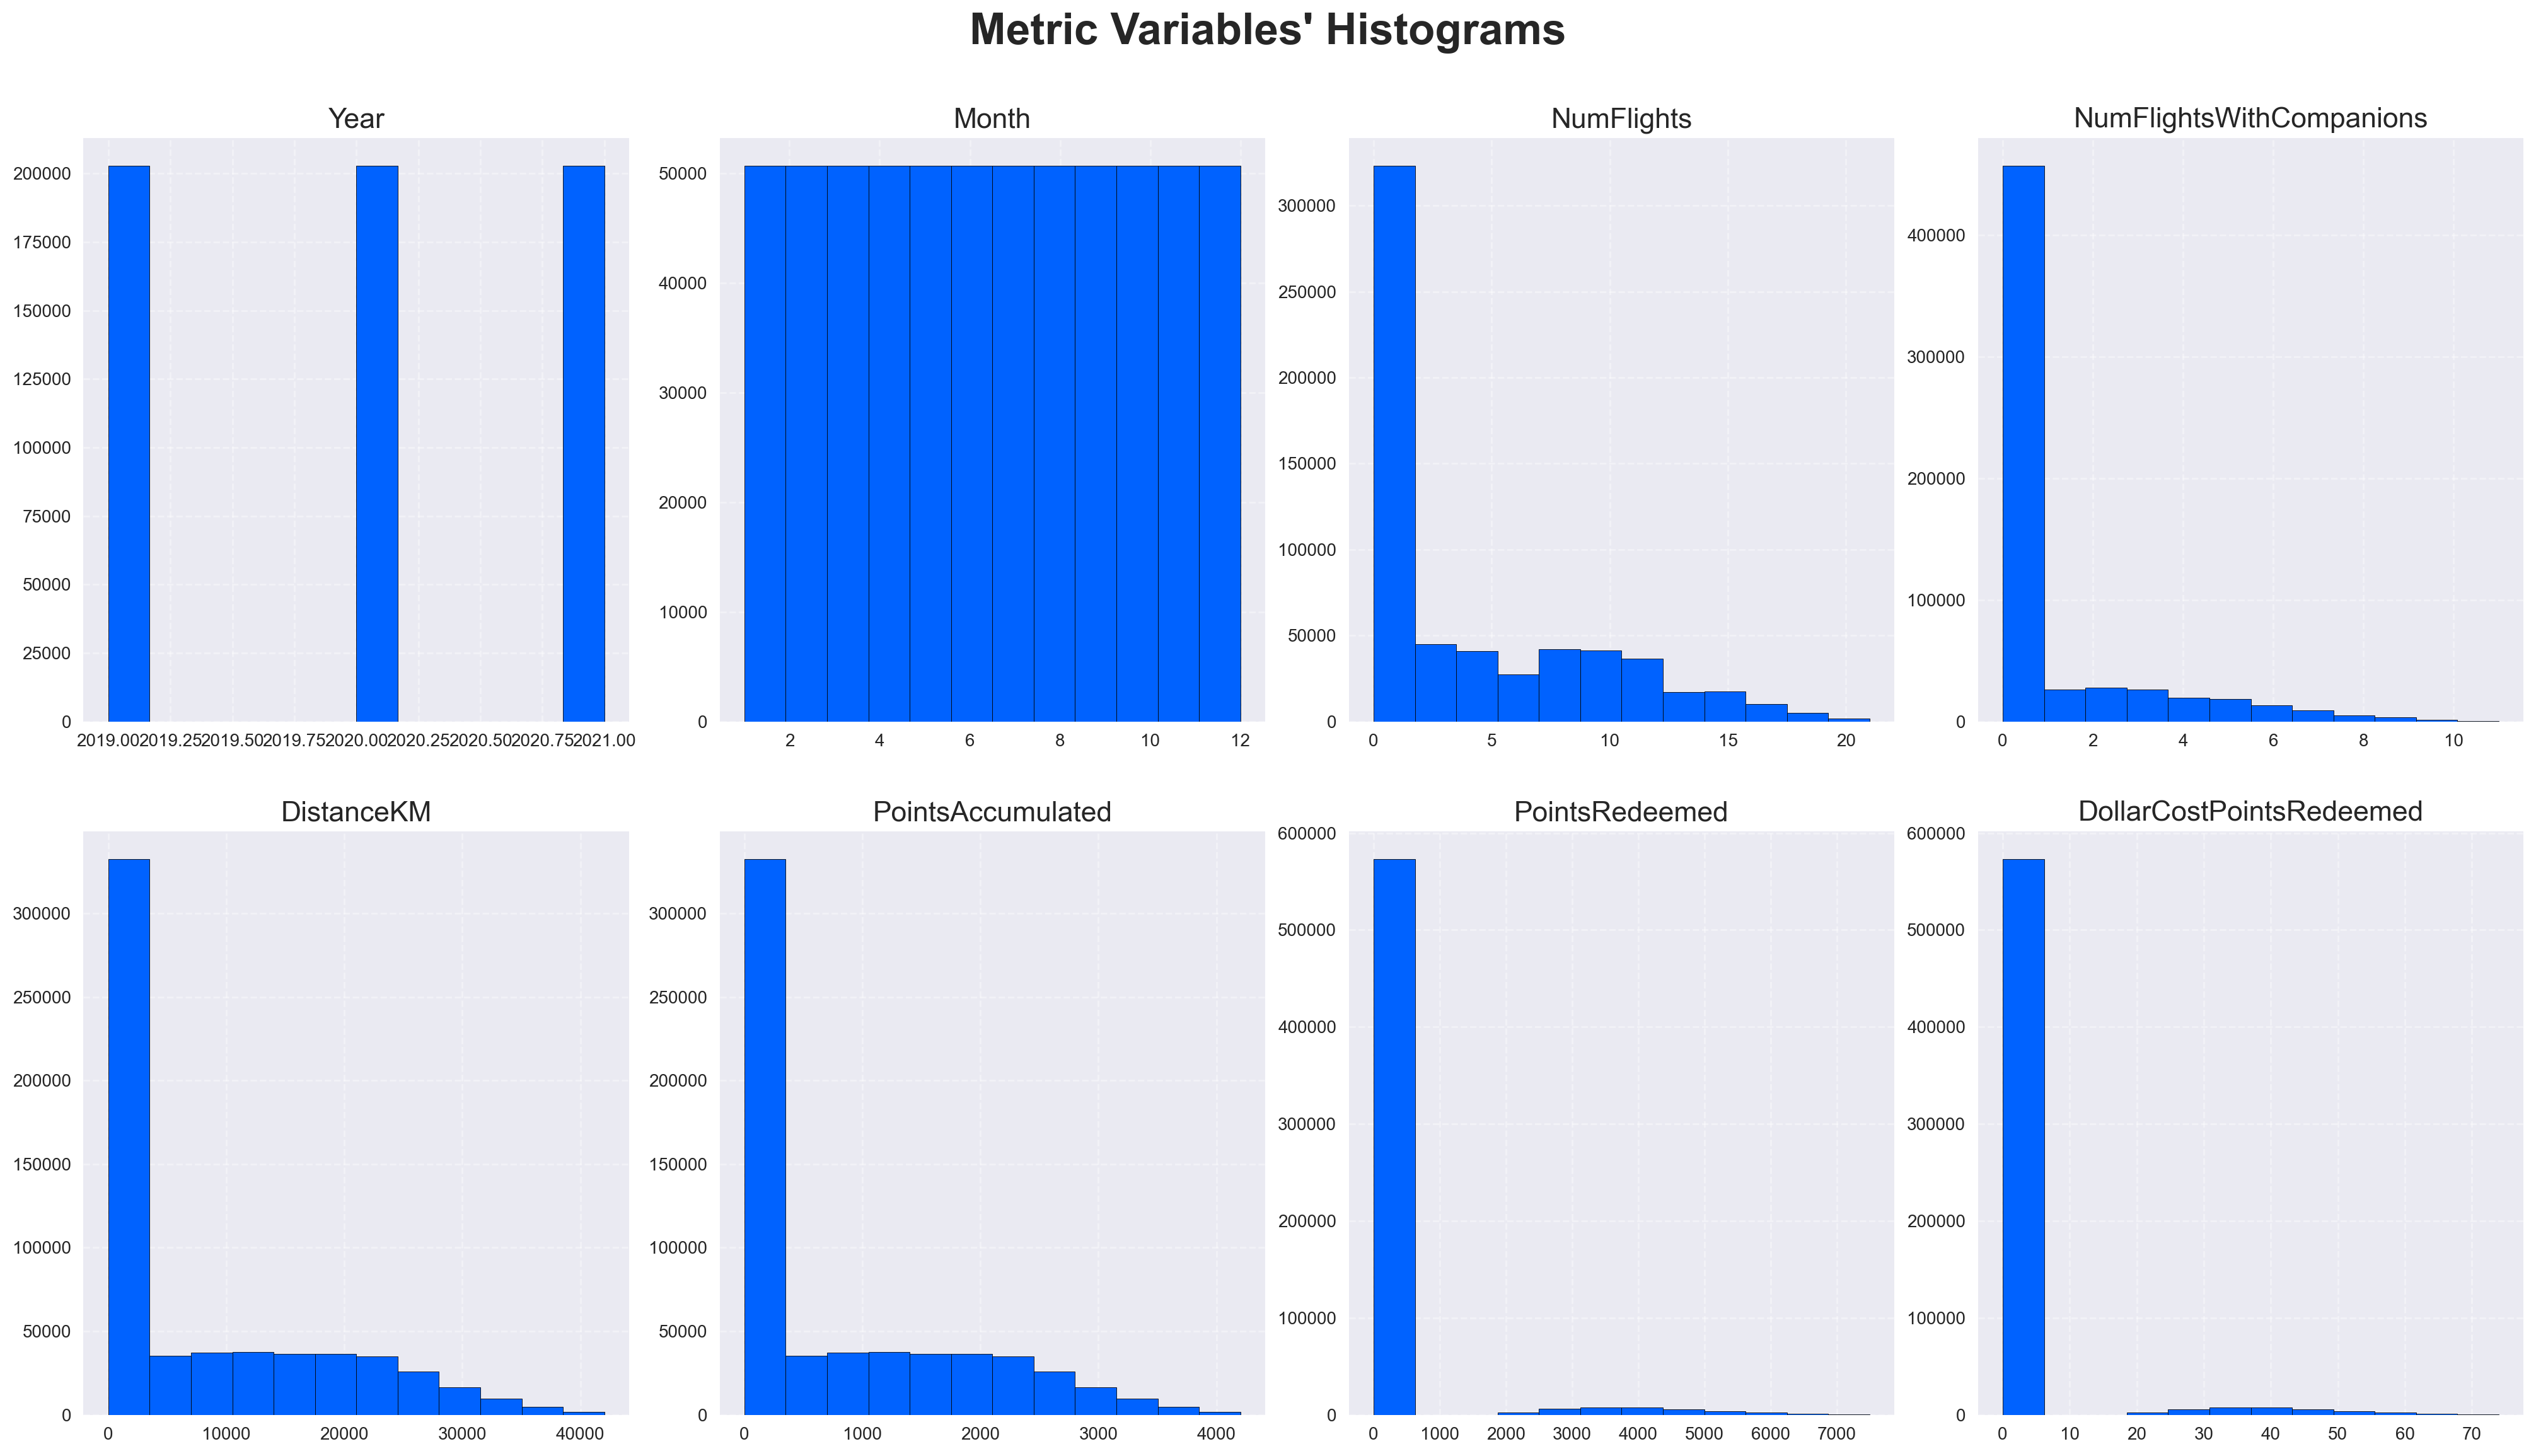

In [ ]:
# Set number of rows and columns
sp_rows_FDB = 2
sp_cols_FDB = ceil(len(metric_features_FDB) / sp_rows_FDB) # adapt the number of columns to the number of features

# Set minimal style
plt.style.use("seaborn-v0_8")

# Create a canvas for the metric features
fig, axes = plt.subplots(sp_rows_FDB, 
                         sp_cols_FDB, 
                         figsize=(20, 11),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features_FDB):
    # Set bins, change inside and edge color of the graphs for better contrast
    ax.hist(flightsDB[feat], bins=12, color="#0062FF", edgecolor="black") # 12 bins to accomodate the feature 'month' and because no interpretability in the other graphs is lost
    
    # Put title of each graph with bigger font
    ax.set_title(feat, fontsize=16)

    # Put grid with low opacity and dashed line so it's visible, but not distracting
    ax.grid(True, linestyle="--", alpha=0.4)

# Layout
# Add title, make it bigger and bold and add space between title and first row of plots
plt.suptitle("Metric Variables' Histograms", 
             fontsize = 25, fontweight="bold", y=1.05)


# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)
    
# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

# Show plot
plt.show()

From the histograms above we can see that:

- `Year:` The data is distributed only between 2019 and 2021, indicating that the set covers three years of operations. The number of records is similar between years, suggesting consistency in data collection over time.
- `Month:` he frequency of the first few months and the last ones is higher than the middle months. Also, the middle months have all the same frequency, this is the distribution is almost uniform across this months;
- `Number of Flights and Flights with Companions:` Most customers make few trips (1 to 3 flights). Few customers travel frequently—they are the outliers;
- `Distance KM:` Most flights are short-haul. There are some long-haul flights that can represent the outliers;
- `Points Accumulated:` Only a few customers accumulate many points;
- `Points Redeemed:` Many customers do not redeem points or redeem very few;
- `Dollar Cost Points Redeemed:` The financial use of points is uncommon, this means only a few customers redeem points by converting them into cash. When they do, the amounts vary widely.

Now we do the boxplot for each metric feature.

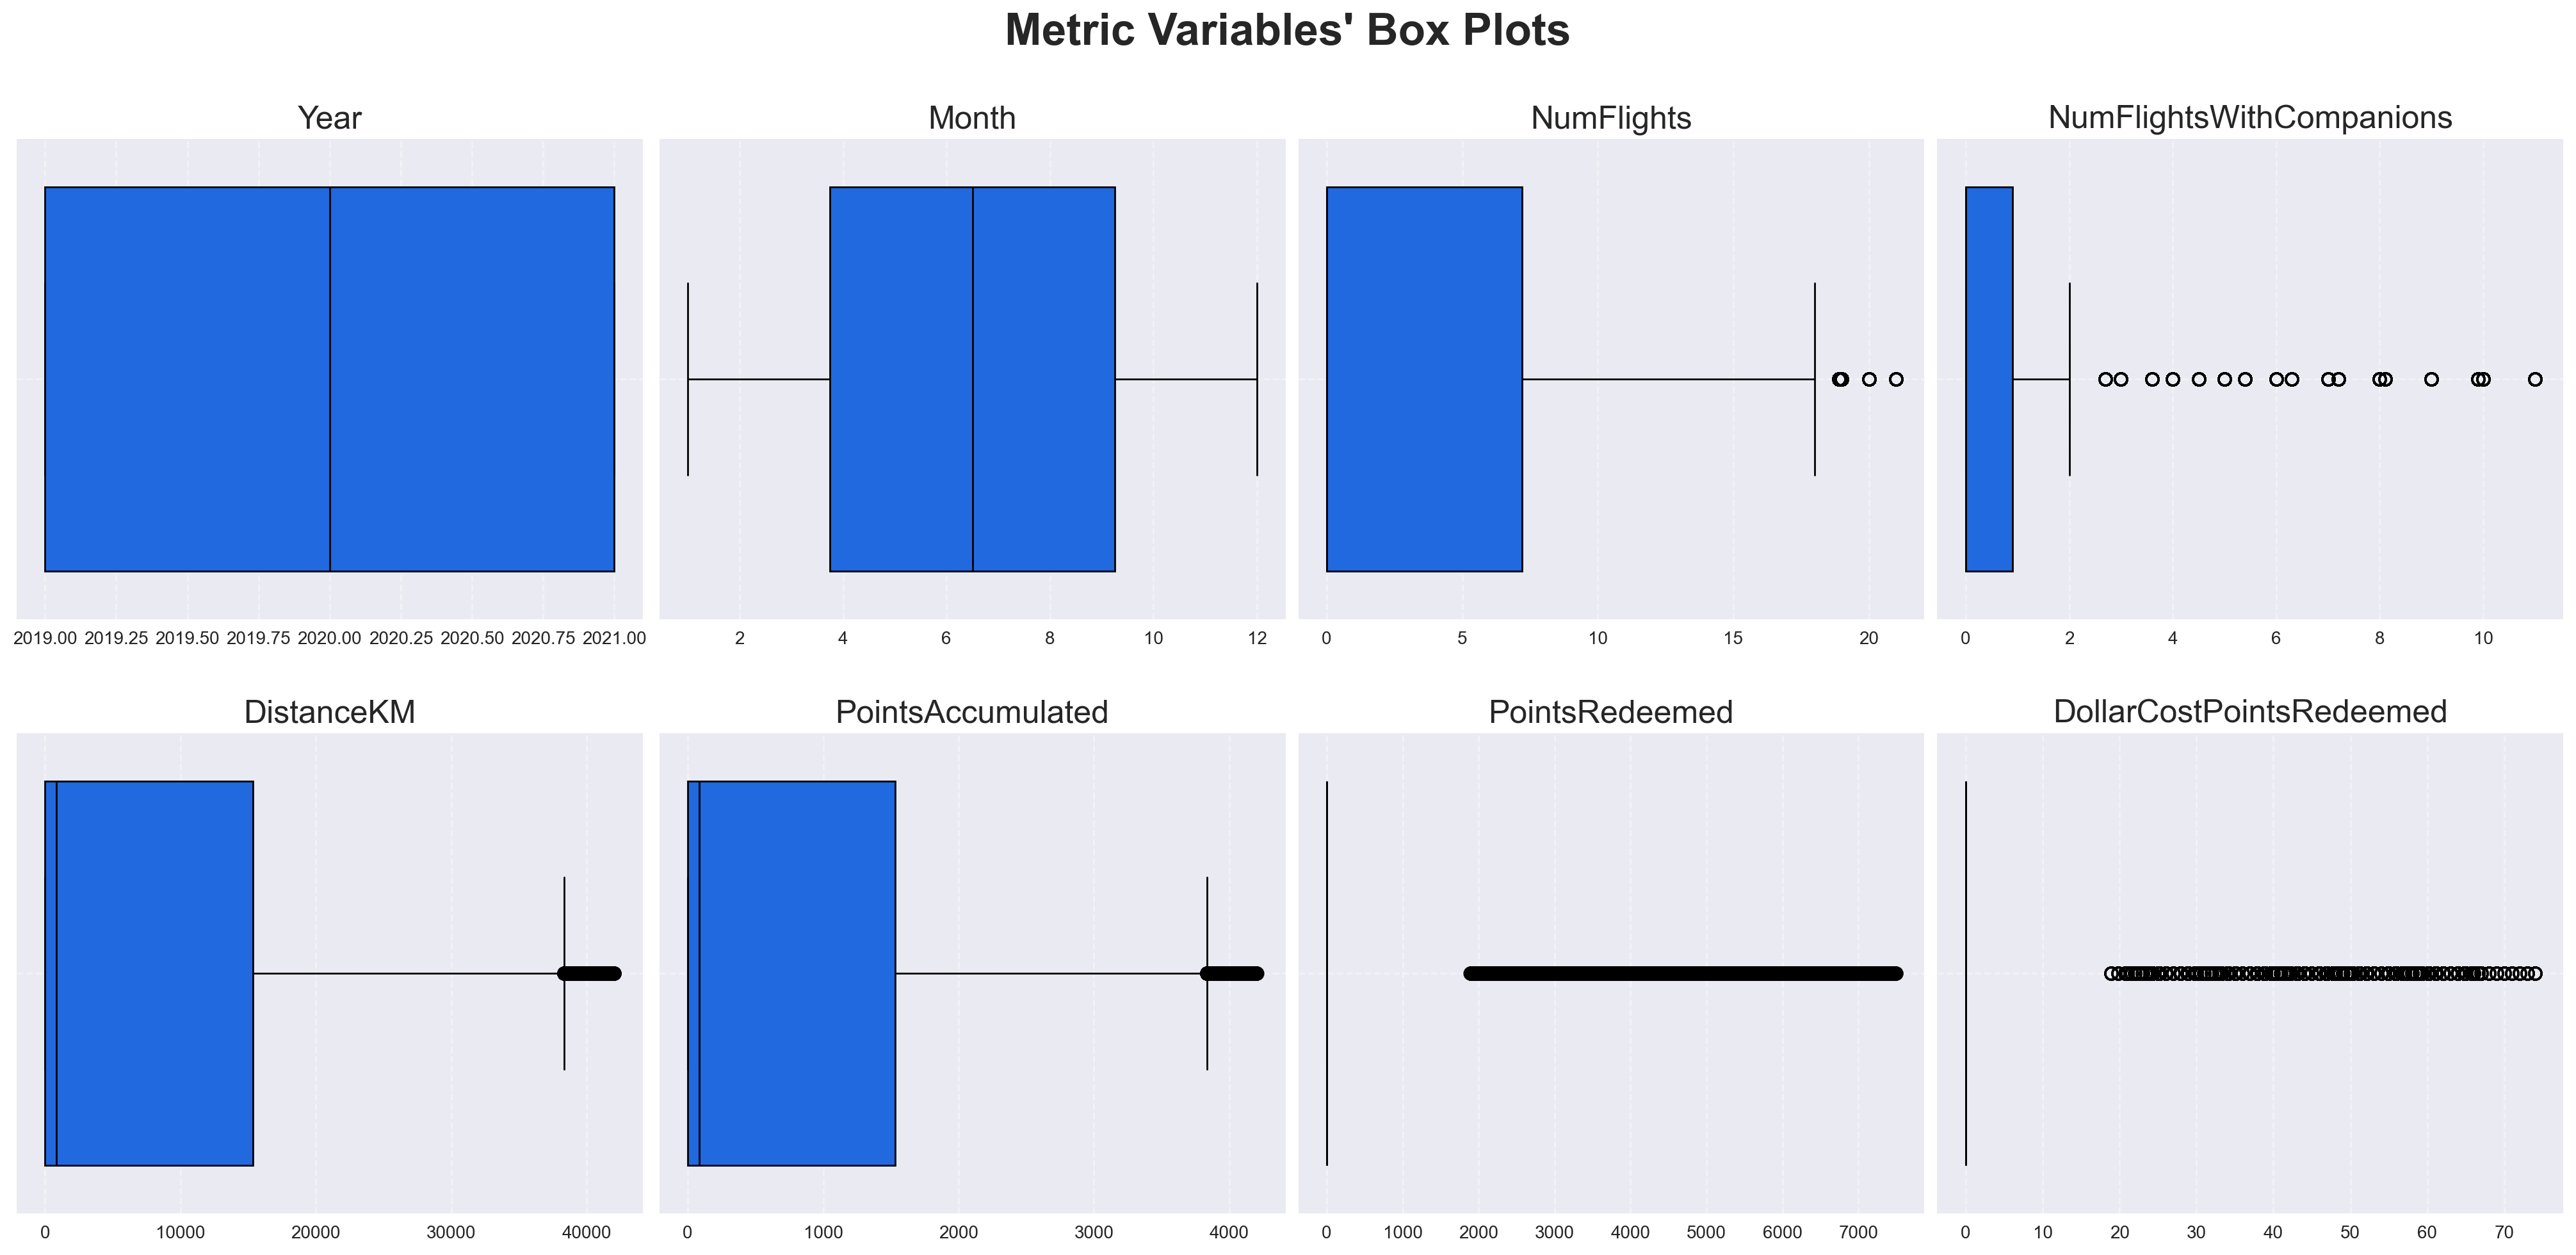

In [ ]:
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows_FDB, 
                         sp_cols_FDB, 
                         figsize=(20, 10),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features_FDB): 
    sns.boxplot(x=flightsDB[feat], ax=ax,
                # Set inside color to blue
                color="#0062FF",
                # Set line colors to black
                boxprops=dict(edgecolor="black"),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                medianprops=dict(color="black"),
                flierprops=dict(markeredgecolor="black"))
    
    # Put grid with low opacity and dashed line so it's visible, but not distracting
    ax.grid(True, linestyle="--", alpha=0.4)

    # Put title of each graph with bigger font
    ax.set_title(feat, fontsize=18)

    # Hide x label since we already have the boxlplot title at the top
    ax.set_xlabel("")
    
# Layout
# Add title and make it bigger
plt.suptitle("Metric Variables' Box Plots", 
             fontsize = 25, fontweight="bold")

# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)

# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

# Show plot
plt.show()

From the boxplots above we can conclude that:

- `Year:` The values are evenly distributed between 2019 and 2021, with no outliers;
- `Month:` The distribution is almost uniform, with slight asymmetry (probably more records in the first and last few months).
- `Number of Flights:` Low median and strong skew to the right (positive asymmetry). Many outliers above ~15 flights — few customers travel frequently;
- `Number of Flights with Companions:` Median close to 0 and some outliers that represent the clients that travel in big groups;
- `Distance KM:` large number of short flights and a few very long ones that greatly influence the average;
- `Points Accumulated:` Very low median and a lot of outliers. This means that only a few customers accumulate large volumes of points;
-`Points Redeemed:` The same as before, a very big majority of values are low with a big number of outliers;
- `Dollar Cost Points Redeemed:` A very similar distribution to 'Points Redeemed' as expected, with the majority of values being close to 0 and many outliers.

## Descriptive Statistics and Visualisations (CustomerDB) - Lourenço

Create 2 lists to differentiate from metric and non-metric features.

In [9]:
metric_features_CDB = customerDB.select_dtypes(include=['number']).columns.tolist()
non_metric_features_CDB = customerDB.columns.drop(metric_features_CDB).to_list()

print("Metric Features:")
for i, feature in enumerate(metric_features_CDB, 1):
    print(f" {i}. {feature}")

print("\nNon-Metric Features:")
for i, feature in enumerate(non_metric_features_CDB, 1):
    print(f" {i}. {feature}")

Metric Features:
 1. Latitude
 2. Longitude
 3. Income
 4. Customer Lifetime Value

Non-Metric Features:
 1. First Name
 2. Last Name
 3. Customer Name
 4. Country
 5. Province or State
 6. City
 7. Postal code
 8. Gender
 9. Education
 10. Location Code
 11. Marital Status
 12. LoyaltyStatus
 13. EnrollmentDateOpening
 14. CancellationDate
 15. EnrollmentType


Create histograms for a general analysis of the features

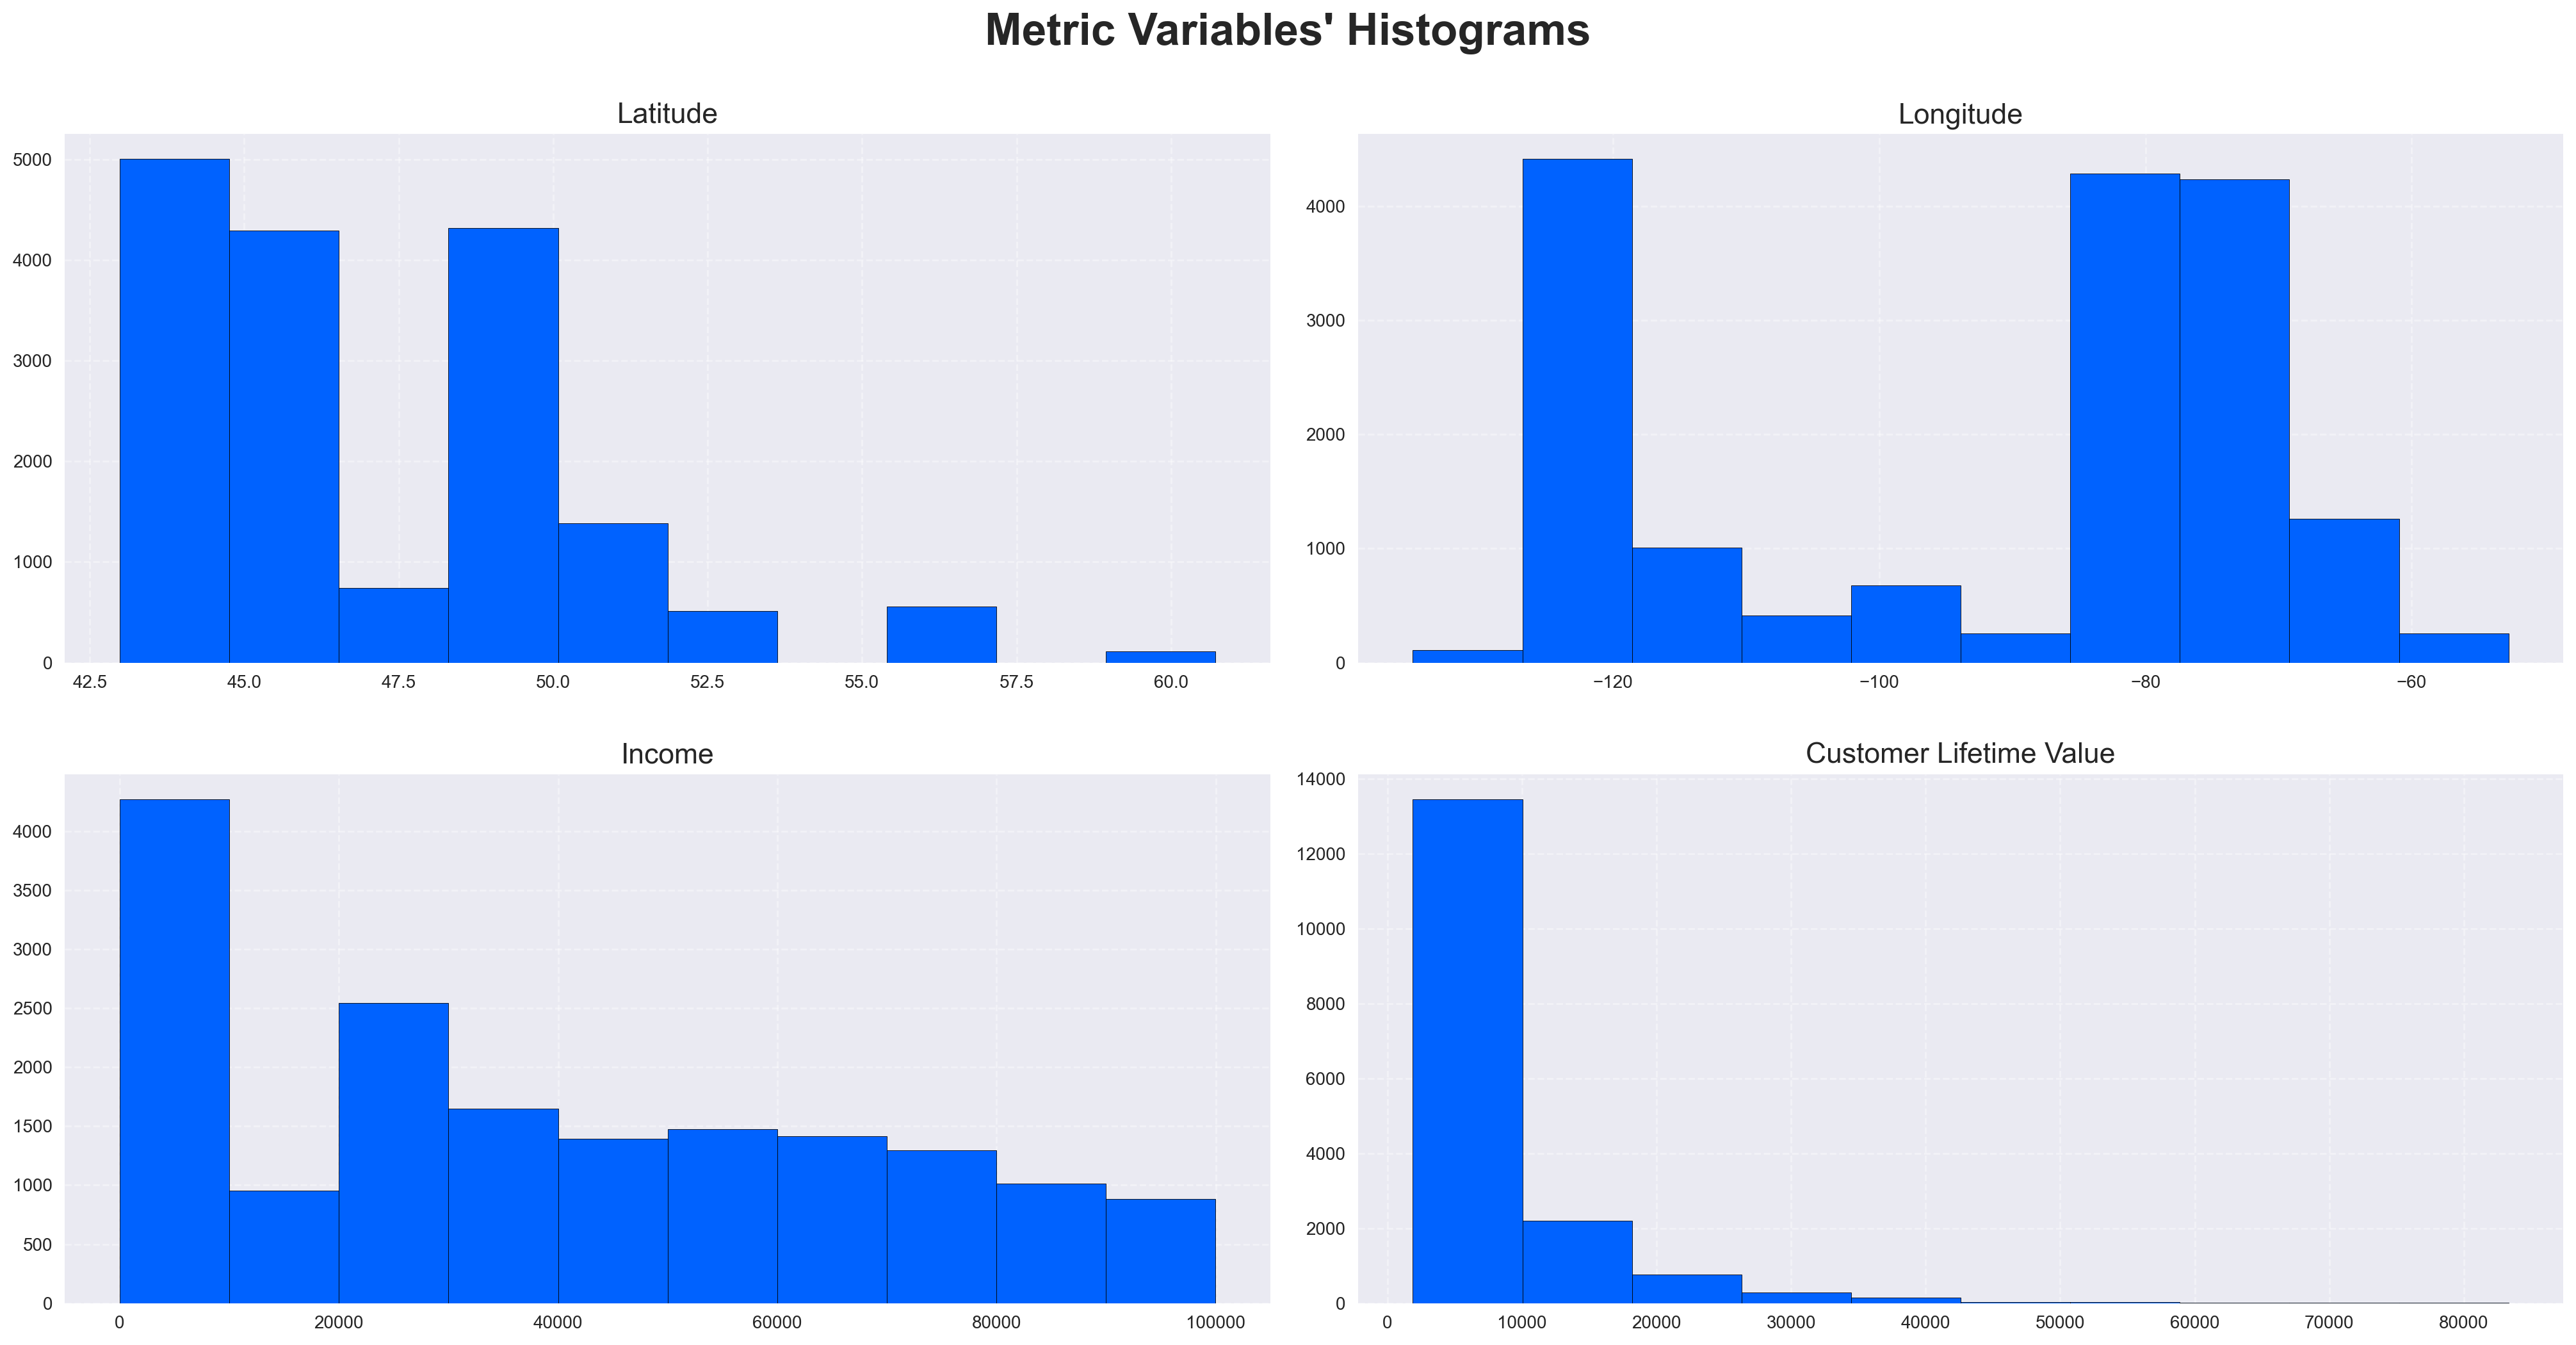

In [ ]:
# Set number of rows and columns
sp_rows_CDB = 2
sp_cols_CDB = ceil(len(metric_features_CDB) / sp_rows_CDB) # adapt the number of columns to the number of features

# Set minimal style
plt.style.use("seaborn-v0_8")

# Create a canvas for the metric features
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 10),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot the data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features_CDB):
    # Set 10 bins, change inside and edge color of the graphs for better contrast
    ax.hist(customerDB[feat], bins=10, color="#0062FF", edgecolor="black")
    
    # Put title of each graph with bigger font
    ax.set_title(feat, fontsize=16)
    
    # Put grid with low oppacity and dashed line so it's visible, but not distracting
    ax.grid(True, linestyle="--", alpha=0.4)
    
# Layout
# Add title, make it bigger and bold and add space between title and first row of plots
plt.suptitle("Metric Variables' Histograms", 
             fontsize = 25, fontweight="bold", y=1.05)

# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)
    
# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

# Show plot
plt.show()

Create boxplots

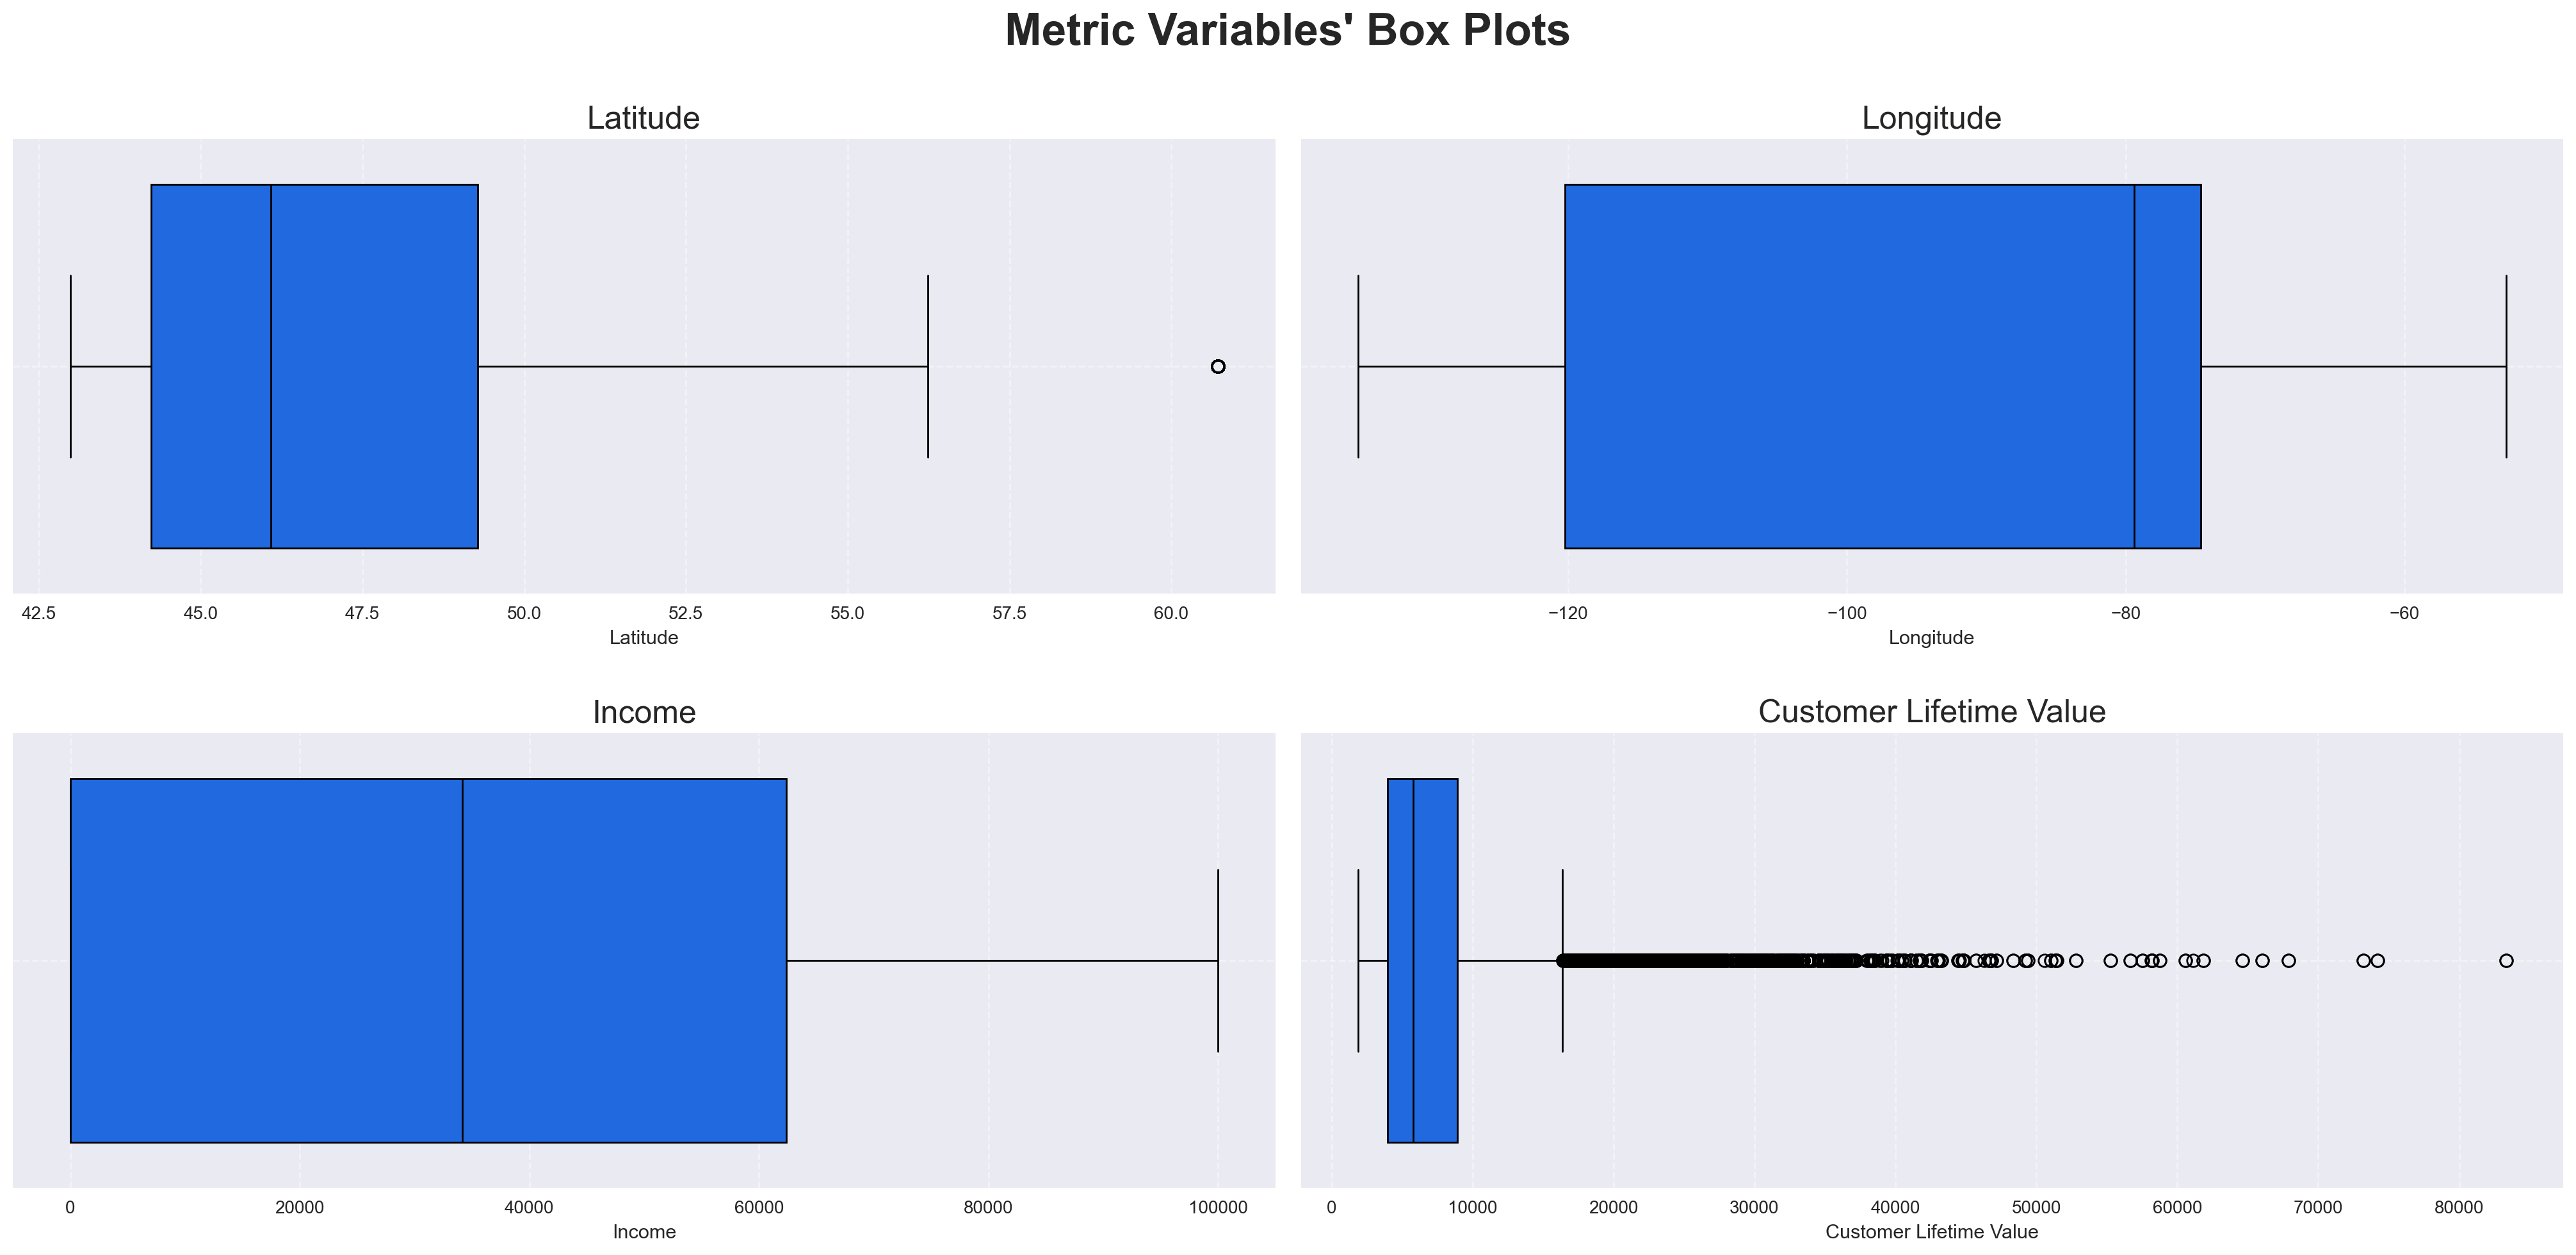

In [ ]:
# Create canvas with the same structure as before
fig, axes = plt.subplots(sp_rows_CDB, 
                         sp_cols_CDB, 
                         figsize=(20, 10),
                         constrained_layout=True) # Adjust automatically spacing between subplot and labels 

# Increase vertical space between rows
fig.set_constrained_layout_pads(h_pad=.2)

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features_CDB):
    # We need to reset the index to avoid errors since we haven't dealt with duplicate values yet
    sns.boxplot(x=customerDB[feat].reset_index(drop= True), ax=ax, 
                # Set inside color to blue
                color="#0062FF",
                # Set line colors to black
                boxprops=dict(edgecolor="black"),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                medianprops=dict(color="black"),
                flierprops=dict(markeredgecolor="black")) 
    
    # Put grid with low opacity and dashed line so it's visible, but not distracting
    ax.grid(True, linestyle="--", alpha=0.4)

    # Put title of each graph with bigger font
    ax.set_title(feat, fontsize=18)

    # Hide x label since we already have the boxlplot title at the top
    ax.set_xlabel("") 

# Layout
# Add a centered title to the figure and plot it
plt.suptitle("Metric Variables' Box Plots", 
             fontsize = 25, fontweight="bold")

# Create the folder '../figures/eda' if it doesn't already exist
os.makedirs(os.path.join('..', 'figures', 'eda'), exist_ok=True)

# Save figure to a png file in the folder created before
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

# Show plot
plt.show()

From the boxplots above we can conclude that:

- `Latitude:` The values range between ~43-56.5°, with most values on the higher latitudes and one outlier more up north.
- `Longitude:` Values between -140° and -55° with a lot of values on lower longitudes, no outliers.
- The combination of these two features tells us AIA's customers are from North America, more specifically from Canada and the northern states of the USA.
- `Income:` There is a wide range of salaries, a quarter of the customers have income close to zero and another quarter has low-mid income, which pulls the median down and provokes right skewness. No outliers.
- `Customer Lifetime Value:` It's always at least ~1000$ and has a median of around 6000$. Has a very right skewed distribution with lots of outliers that represent the customers that are very profitable and thus important for the company.

Since Latitude and Longitude go together, we can plot them in a Scatter plot to see if there are any clusters of coordinates that could represent cities where our customers are concentrated. 

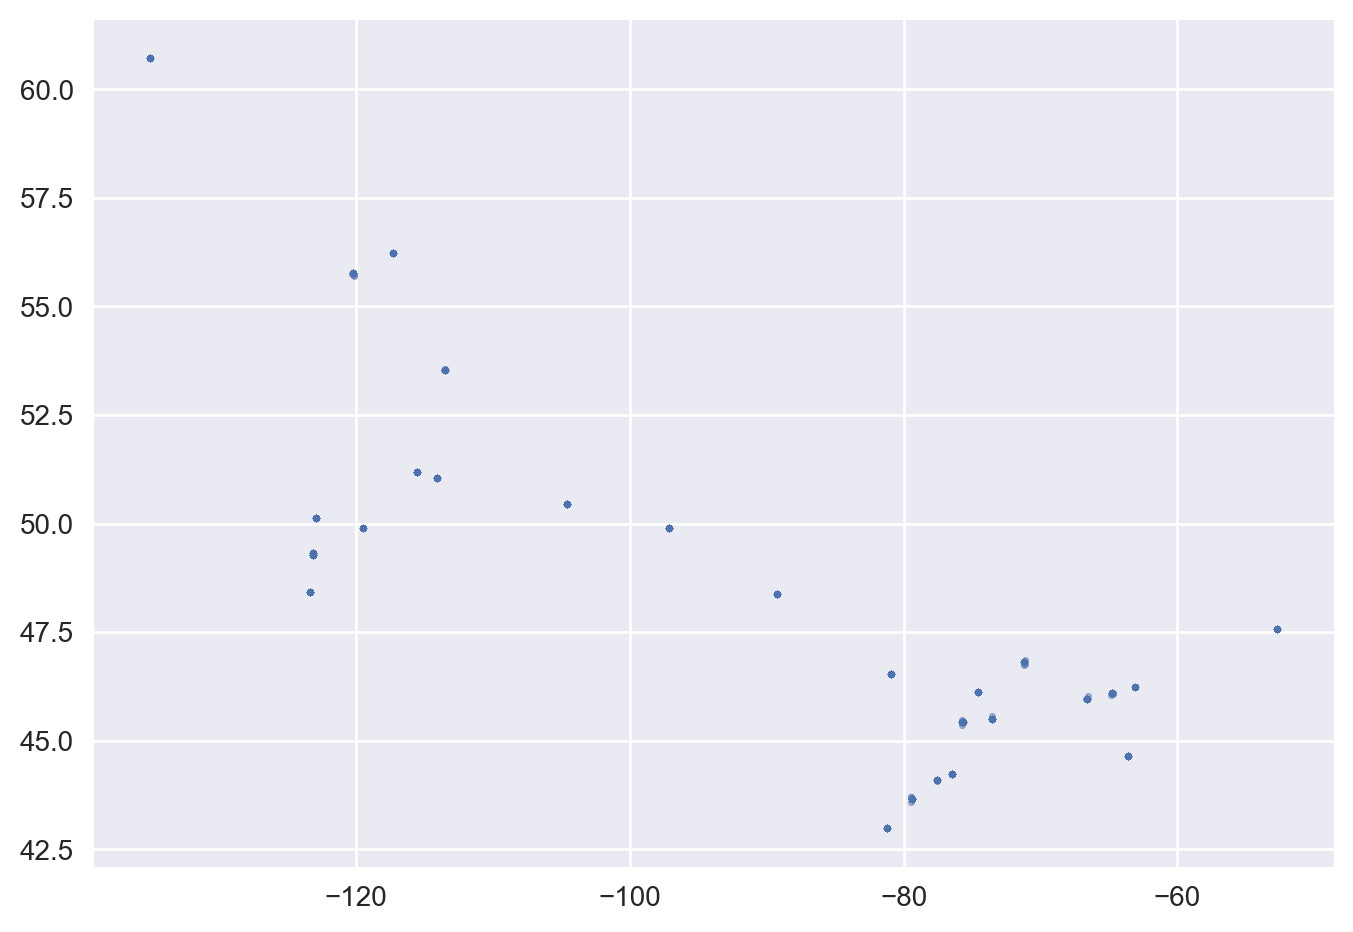

In [73]:
plt.scatter(customerDB["Longitude"], customerDB["Latitude"], s=5, alpha=0.5)

The graph is very underwhelming. We were expecting lots of data, but looks like there are very few Latitude-Longitude points, which doesn't allow us to make much conclusions.

In [103]:
lat_count = customerDB["Latitude"].count()
long_count = customerDB["Longitude"].count()

print(f"Latitude has {lat_count} values.")
print(f"Longitude has {long_count} values.")

Latitude has 16921 values.
Longitude has 16921 values.


In [105]:
lat_duplicated = customerDB["Latitude"].duplicated().sum()
long_duplicated = customerDB["Longitude"].duplicated().sum()

print(f"The Latitude column has {lat_duplicated} duplicated values, which represents {(lat_duplicated/lat_count*100).round(2)}% of the total data.")
print(f"The Longitude column has {long_duplicated} duplicated values, which represents {(long_duplicated/long_count*100).round(2)}% of the total data.")

The Latitude column has 16872 duplicated values, which represents 99.71% of the total data.
The Longitude column has 16872 duplicated values, which represents 99.71% of the total data.


This explains why we had so few points in the scatter plot. Let's see what exactly are the values.

In [111]:
customerDB[["Latitude","Longitude"]].value_counts()

Latitude   Longitude  
43.653225  -79.383186     3387
49.282730  -123.120740    2600
45.501690  -73.567253     2064
49.895138  -97.138374      676
50.116322  -122.957360     586
44.648766  -63.575237      541
45.421532  -75.697189      516
53.544388  -113.490930     510
44.101128  -77.576309      490
46.813877  -71.207977      481
55.759628  -120.237660     441
45.963589  -66.643112      432
50.445210  -104.618900     412
44.231171  -76.485954      406
46.118462  -74.596184      399
48.428421  -123.365650     391
45.428730  -75.713364      363
49.328625  -123.160190     315
48.380894  -89.247681      258
47.561508  -52.712578      258
46.522099  -80.953033      229
46.087818  -64.778229      215
51.048615  -114.070850     193
51.178398  -115.570800     190
42.984924  -81.245277      176
56.234180  -117.289380     113
60.721188  -135.056840     112
49.887951  -119.496010      80
46.238239  -63.131069       67
45.365906  -75.723181        1
43.690489  -79.436758        1
55.751178  -120.

By searching what these coordinates represent on Google Maps, we conclude they identify the city the customer is from and not their exact location, probably for privacy reasons.
For example, the first 3 coordinates represent Toronto, Vancouver and Montreal, which are all Canadian cities.

Since we already have a column that represents the name of the city the customer is from, we conclude the **columns for Latitude and Longitude are redundant**.

# Visual Exploration - Lourenço

To do on this section:
- Plotting univariate distributions (histograms and boxplots) for numeric variables
- Using matplotlib and seaborn for data visualization

## Falta fazer:
1. Feature Engineering - Maria
2. Identify Strange Values - Lourenço